## Part I: Building a Basic NN

### Step 1: Loading the Dataset and main statistics

<ol>
    <li>Load the dataset (dataset.csv)</li>
    <li>Analyze the dataset</li>
    <li>Handle invalid character entries, if any</li>
    <li>Provide at least 3 visualization graphs with a short description</li>
</ol>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('./datasets/dataset.csv')

In [3]:
# View data
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [4]:
# Size of the dataset
df.shape

(766, 8)

In [5]:
# metadata of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [6]:
# statistics of the data
df.describe()

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [7]:
# Check for unique values in f1
df['f1'].unique()

array(['6', '1', '8', '0', '5', '3', '10', '2', '4', '7', '9', '11', '13',
       '15', '17', '12', '14', 'c'], dtype=object)

In [8]:
# Replace alphabet with the most frequeny value
df['f1'] = df['f1'].replace('c', df['f1'].mode()[0])

In [9]:
# Check for unique values in f2
df['f2'].unique()

array(['148', '85', '183', '89', '137', '116', '78', '115', '197', '125',
       '110', '168', '139', '189', '166', '100', '118', '107', '103',
       '126', '99', '196', '119', '143', '147', '97', '145', '117', '109',
       '158', '88', '92', '122', '138', '102', '90', '111', '180', '133',
       '106', '171', '159', '146', '71', '105', '101', '176', '150', '73',
       '187', '84', '44', '141', '114', '95', '129', '79', '0', '62',
       '131', '112', '113', '74', '83', '136', '80', '123', '81', '134',
       '142', '144', '93', '163', '151', '96', '155', '76', '160', '124',
       '162', '132', '120', '173', '170', '128', '108', '154', '57',
       '156', '153', '188', '152', '104', '87', '75', '179', '130', '194',
       '181', '135', '184', '140', '177', '164', '91', '165', '86', '193',
       '191', '161', '167', '77', '182', '157', '178', '61', '98', '127',
       '82', '72', '172', '94', '175', '195', '68', '186', '198', '121',
       '67', '174', '199', '56', '169', '149', '6

In [10]:
# Replace alphabet with the most frequeny value
df['f2'] = df['f2'].replace('f', df['f2'].mode()[0])

In [11]:
# Check for unique values in f4
df['f4'].unique()

array(['35', '29', '0', '23', '32', '45', '19', '47', '38', '30', '41',
       '33', '26', '15', '36', '11', '31', '37', '42', '25', '18', '24',
       '39', '27', '21', '34', '10', '60', '13', '20', '22', '28', '54',
       '40', '51', '56', '14', '17', '50', '44', '12', '46', '16', '7',
       '52', '43', '48', '8', '49', '63', '99', 'a'], dtype=object)

In [12]:
# Replace alphabet with the most frequeny value
df['f4'] = df['f4'].replace('a', df['f4'].mode()[0])

In [13]:
# Check for unique values in f5
df['f5'].unique()

array(['0', '94', '168', '88', '543', '846', '175', '230', '83', '96',
       '235', '146', '115', '140', '110', '245', '54', '192', '207', '70',
       '240', '82', '36', '23', '300', '342', '304', '142', '128', '38',
       '100', '90', '270', '71', '125', '176', '48', '64', '228', '76',
       '220', '40', '152', '18', '135', '495', '37', '51', '99', '145',
       '225', '49', '50', '92', '325', '63', '284', '119', '204', '155',
       '485', '53', '114', '105', '285', '156', '78', '130', '55', '58',
       '160', '210', '318', '44', '190', '280', '87', '271', '129', '120',
       '478', '56', '32', '744', '370', '45', '194', '680', '402', '258',
       '375', '150', '67', '57', '116', '278', '122', '545', '75', '74',
       '182', '360', '215', '184', '42', '132', '148', '180', '205', '85',
       '231', '29', '68', '52', '255', '171', '73', '108', '43', '167',
       '249', '293', '66', '465', '89', '158', '84', '72', '59', '81',
       '196', '415', '275', '165', '579', '310', '6

In [14]:
# Replace alphabet with the most frequeny value
df['f5'] = df['f5'].replace('b', df['f5'].mode()[0])

In [15]:
# Check for unique values in f6
df['f6'].unique()

array(['33.6', '26.6', '23.3', '28.1', '43.1', '25.6', '31', '35.3',
       '30.5', '0', '37.6', '38', '27.1', '30.1', '25.8', '30', '45.8',
       '29.6', '43.3', '34.6', '39.3', '35.4', '39.8', '29', '36.6',
       '31.1', '39.4', '23.2', '22.2', '34.1', '36', '31.6', '24.8',
       '19.9', '27.6', '24', '33.2', '32.9', '38.2', '37.1', '34', '40.2',
       '22.7', '45.4', '27.4', '42', '29.7', '28', '39.1', '19.4', '24.2',
       '24.4', '33.7', '34.7', '23', '37.7', '46.8', '40.5', '41.5', '25',
       '25.4', '32.8', '32.5', '42.7', '19.6', '28.9', '28.6', '43.4',
       '35.1', '32', '24.7', '32.6', '43.2', '22.4', '29.3', '24.6',
       '48.8', '32.4', '38.5', '26.5', '19.1', '46.7', '23.8', '33.9',
       '20.4', '28.7', '49.7', '39', '26.1', '22.5', '39.6', '29.5',
       '34.3', '37.4', '33.3', '31.2', '28.2', '53.2', '34.2', '26.8',
       '55', '42.9', '34.5', '27.9', '38.3', '21.1', '33.8', '30.8',
       '36.9', '39.5', '27.3', '21.9', '40.6', '47.9', '50', '25.2',
       

In [16]:
# Replace alphabet with the most frequeny value
df['f6'] = df['f6'].replace('d', df['f6'].mode()[0])

In [17]:
# Check for unique values in f7
df['f7'].unique()

array(['0.627', '0.351', '0.672', '0.167', '2.288', '0.201', '0.248',
       '0.134', '0.158', '0.232', '0.191', '0.537', '1.441', '0.398',
       '0.587', '0.484', '0.551', '0.254', '0.183', '0.529', '0.704',
       '0.388', '0.451', '0.263', '0.205', '0.257', '0.487', '0.245',
       '0.337', '0.546', '0.851', '0.267', '0.188', '0.512', '0.966',
       '0.42', '0.665', '0.503', '1.39', '0.271', '0.696', '0.235',
       '0.721', '0.294', '1.893', '0.564', '0.586', '0.344', '0.305',
       '0.491', '0.526', '0.342', '0.467', '0.718', '0.962', '1.781',
       '0.173', '0.304', '0.27', '0.699', '0.258', '0.203', '0.855',
       '0.845', '0.334', '0.189', '0.867', '0.411', '0.583', '0.231',
       '0.396', '0.14', '0.391', '0.37', '0.307', '0.102', '0.767',
       '0.237', '0.227', '0.698', '0.178', '0.324', '0.153', '0.165',
       '0.443', '0.261', '0.277', '0.761', '0.255', '0.13', '0.323',
       '0.356', '0.325', '1.222', '0.179', '0.262', '0.283', '0.93',
       '0.801', '0.207', '0

In [18]:
# Replace alphabet with the most frequeny value
df['f7'] = df['f7'].replace('e', df['f7'].mode()[0])

In [19]:
# Check if the data has any null values
df.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

In [20]:
# Convert the object columns to numerical field as they contain numerical values
df['f1'] = pd.to_numeric(df['f1'])
df['f2'] = pd.to_numeric(df['f2'])
df['f4'] = pd.to_numeric(df['f4'])
df['f5'] = pd.to_numeric(df['f5'])
df['f6'] = pd.to_numeric(df['f6'])
df['f7'] = pd.to_numeric(df['f7'])

In [21]:
# After conversion view the statistics of the data
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,3.845953,120.882507,69.118799,20.515666,79.986945,31.998172,0.471843,0.349869
std,3.373062,31.935995,19.376901,15.967341,115.335259,7.893111,0.331421,0.477240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.244000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.372500,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.750000,36.600000,0.625500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


In [22]:
# Save preprossed data
df.to_csv('dataset_preprocessed.csv', index=False)

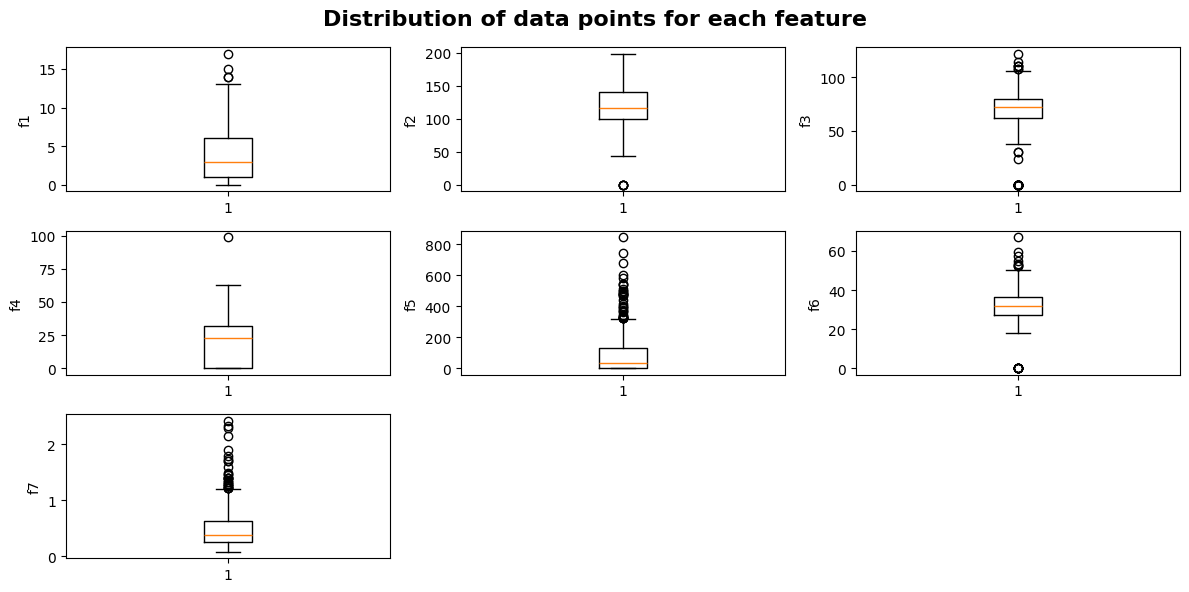

In [23]:
# Box plot to visualize the distibution of data points of each feture
plt.figure(figsize=(12, 6))

plt.subplot(3, 3, 1)
plt.boxplot(df['f1'])
plt.ylabel('f1')

plt.subplot(3, 3, 2)
plt.boxplot(df['f2'])
plt.ylabel('f2')

plt.subplot(3, 3, 3)
plt.boxplot(df['f3'])
plt.ylabel('f3')

plt.subplot(3, 3, 4)
plt.boxplot(df['f4'])
plt.ylabel('f4')

plt.subplot(3, 3, 5)
plt.boxplot(df['f5'])
plt.ylabel('f5')

plt.subplot(3, 3, 6)
plt.boxplot(df['f6'])
plt.ylabel('f6')

plt.subplot(3, 3, 7)
plt.boxplot(df['f7'])
plt.ylabel('f7')

plt.suptitle('Distribution of data points for each feature', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

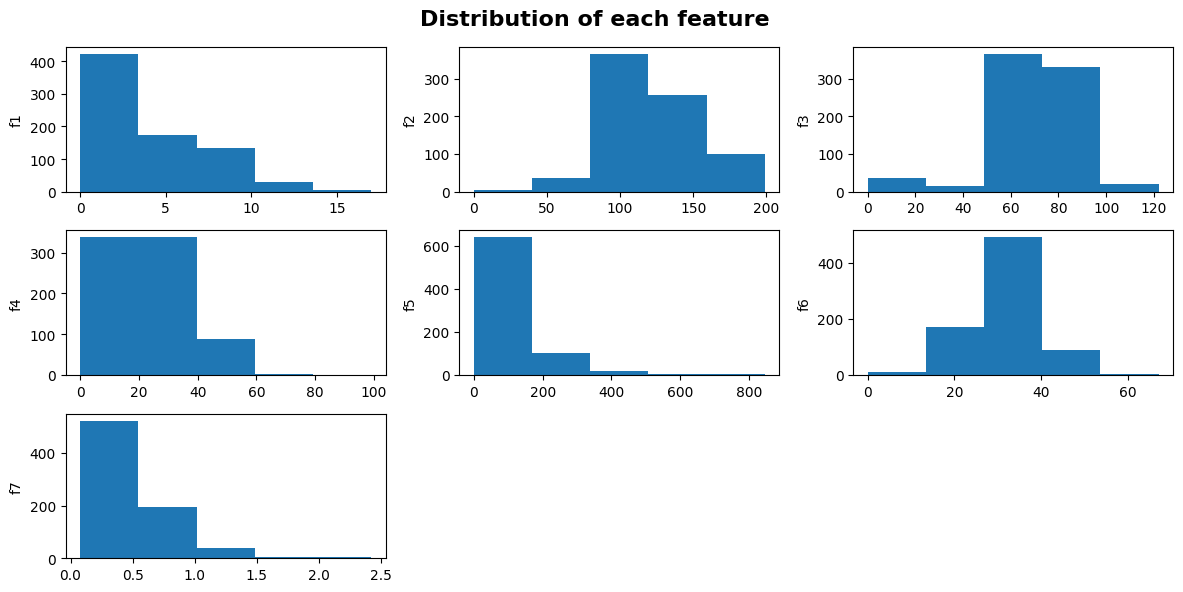

In [24]:
# Histogram to visualize the distribution of features
plt.figure(figsize=(12, 6))

plt.subplot(3, 3, 1)
plt.hist(df['f1'], bins=5)
plt.ylabel('f1')

plt.subplot(3, 3, 2)
plt.hist(df['f2'], bins=5)
plt.ylabel('f2')

plt.subplot(3, 3, 3)
plt.hist(df['f3'], bins=5)
plt.ylabel('f3')

plt.subplot(3, 3, 4)
plt.hist(df['f4'], bins=5)
plt.ylabel('f4')

plt.subplot(3, 3, 5)
plt.hist(df['f5'], bins=5)
plt.ylabel('f5')

plt.subplot(3, 3, 6)
plt.hist(df['f6'], bins=5)
plt.ylabel('f6')

plt.subplot(3, 3, 7)
plt.hist(df['f7'], bins=5)
plt.ylabel('f7')

plt.suptitle('Distribution of each feature', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

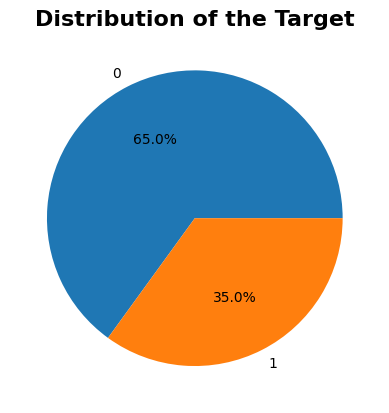

In [25]:
# Pie plot to visualize the distribution of the targets
target = df['target'].groupby(df['target']).count()
plt.figure()
plt.pie(target.values, labels=target.index, autopct='%1.1f%%')
plt.title('Distribution of the Target', fontsize=16, fontweight='bold')
plt.show()

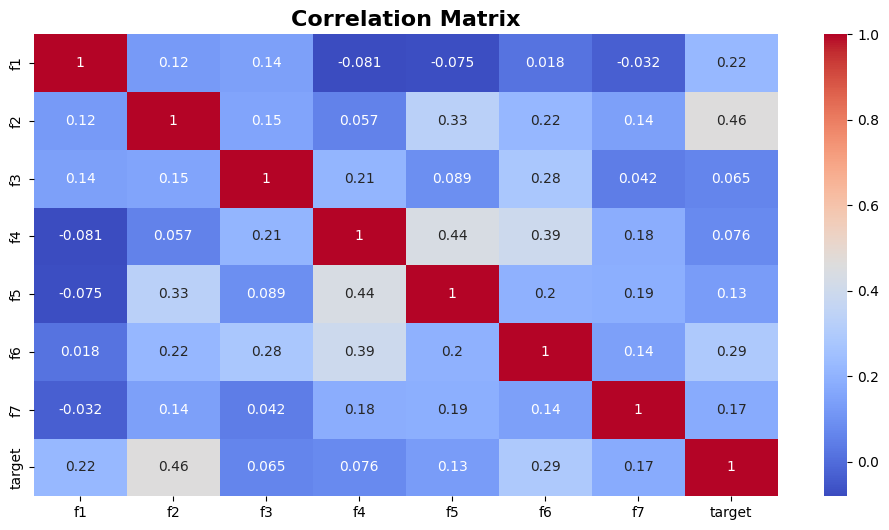

In [26]:
# Heatmap to visualize the correlation among features
plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

### Step 2: Preprocessing and Splitting the Dataset

<ol>
    <li>Preprocess the dataset before we use it to train the neural network</li>
    <li>Split the dataset into training, testing and validation sets</li>
    <li>PyTorch models expect input data in the form of tensors, thus convert the DataFrame to PyTorch tensor (torch.tensor())</li>
</ol>

In [27]:
# Split data to X i.e. feature by dropping columns which has correlation close to 0 with target and target
X = df.drop(columns=['f3', 'f4','target'])
# Split data to y i.e. target 
y = df['target']

In [28]:
# Scale the input features
from sklearn.preprocessing import StandardScaler

# Initialize StandardScalar
scaler = StandardScaler()
# Scale the values of features
X_scaled = scaler.fit_transform(X)

In [29]:
# Split data in training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

In [30]:
# Split the training data in training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [31]:
from sklearn.utils.class_weight import compute_class_weight
import torch

# For improving the nn_model assigning higher weights to minor class
target_class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights = torch.tensor(target_class_weights, dtype=torch.float32)

In [32]:
# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

In [33]:
# Create DataLoader and TensorDataset for shuffling and batching data
from torch.utils.data import DataLoader, TensorDataset

train_tensor_data = TensorDataset(X_train_tensor, y_train_tensor)
val_tensor_data = TensorDataset(X_val_tensor, y_val_tensor)
test_tensor_data = TensorDataset(X_test_tensor, y_test_tensor)

train_data_loader = DataLoader(train_tensor_data, batch_size=32, shuffle=True)
val_data_loader = DataLoader(val_tensor_data, batch_size=32, shuffle=False)
test_data_loader = DataLoader(test_tensor_data, batch_size=32, shuffle=False)

### Step 3: Defining the Neural Network

<ol>
    <li>Decide your NN architecture</li>
    <li>Define your NN architecture using PyTorch</li>
    <li>Return the summary of your model</li>
</ol>

In [34]:
# Define Neural Network
import torch.nn as nn

class NNBinaryClassification(nn.Module):
    def __init__(self):
        super(NNBinaryClassification, self).__init__()
        
        # Define layers of Neural Network
        # Input layer
        self.fc1 = nn.Linear(5, 64)
        # 1st activation function
        self.relu1 = nn.ReLU()
        # 1st hidden layer
        self.fc2 = nn.Linear(64, 64)
        # 2nd activation funtion
        self.relu2 = nn.ReLU()
        # apply dropout
        self.dropout = nn.Dropout(p=0.5)
        # Output layer
        self.fc3 = nn.Linear(64, 1)
        # activation function for the output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x) 
        x = self.relu2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Instantiate the neural network
nn_model = NNBinaryClassification()

In [35]:
print(nn_model)

NNBinaryClassification(
  (fc1): Linear(in_features=5, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [36]:
# Summary of the neural network
from torchinfo import summary

# 32 is the batch size and 5 is the input size
summary(nn_model, input_size=(32, 5))

Layer (type:depth-idx)                   Output Shape              Param #
NNBinaryClassification                   [32, 1]                   --
├─Linear: 1-1                            [32, 64]                  384
├─ReLU: 1-2                              [32, 64]                  --
├─Linear: 1-3                            [32, 64]                  4,160
├─ReLU: 1-4                              [32, 64]                  --
├─Dropout: 1-5                           [32, 64]                  --
├─Linear: 1-6                            [32, 1]                   65
├─Sigmoid: 1-7                           [32, 1]                   --
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.15
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 0.02
Estimated Total Size (MB): 0.05

### Step 4: Training the Neural Network

<ol>
    <li>Define the loss function (loss_function) that will be used to compute the error between the predicted output and the true labels of the training data</li>
    <li>Choose an optimizer and a learning rate</li>
    <li>Set up the training loop</li>
    <li>Train the neural network</li>
    <li>Save the weights of the trained neural network that returns the best results</li>
    <li>Evaluate the performance of the model on the testing data</li>
    <li>Visualize the results</li>
</ol>

In [37]:
# Define the loss function we have chosen Binary Cross Entropy Loss for binary classification
loss_function = nn.BCEWithLogitsLoss(pos_weight=weights[1])

In [38]:
# Define an optimizer we have chosen Stochastic Gradient Descent
import torch.optim as optim

learning_rate = 0.01
optimizer = optim.SGD(nn_model.parameters(), lr=learning_rate, momentum=0.9)

In [39]:
import time

epochs = 20
batch_size = 32

# Initialize empty lists for storing training and validation accuracy
train_accuracies = []
val_accuracies = []

# Initialize empty lists for storing training and validation loss
train_losses = []
val_losses = []

In [40]:
st = time.time()

# Training 
for epoch in range(epochs):

    nn_model.train()

    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in train_data_loader:
        outputs = nn_model(inputs)

        # Reshape to match the output shape
        labels = labels.view(-1, 1)

        # Calculate accuracy
        predicted_classes = torch.round(outputs)
        correct_predictions += (predicted_classes == labels).sum().item()
        total_predictions += labels.size(0)
        
        # Calculate loss
        loss = loss_function(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()


    # Calculate training accuracy for each epoch
    train_accuracy = correct_predictions / total_predictions
    train_accuracies.append(train_accuracy)

    # Calculate training loss for each epoch
    train_loss = running_loss / len(train_data_loader)
    train_losses.append(train_loss)

    
    # Evaluate/Validate neural network model
    nn_model.eval()

    val_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_data_loader:
            val_outputs = nn_model(val_inputs)
            
            # Reshape labels
            val_labels = val_labels.view(-1, 1)

            # Calculate validation accuracy
            val_predicted_classes = torch.round(val_outputs)  # Use val_outputs instead
            val_correct_predictions += (val_predicted_classes == val_labels).sum().item()
            val_total_predictions += val_labels.size(0)
            
            # Calculate validation loss
            loss = loss_function(val_outputs, val_labels)
            val_loss += loss.item()

    # Calculate the validation accuracy for each epoch
    val_accuracy = val_correct_predictions / val_total_predictions if val_total_predictions > 0 else 0
    val_accuracies.append(val_accuracy)

    # Calculate the validation loss for each epoch
    val_loss = val_loss / len(val_data_loader)
    val_losses.append(val_loss)
    
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.3f}, Validation Loss: {val_loss:.3f}')

et = time.time()
training_time = et - st

print(f"Training completed in {training_time // 60:.0f}min {training_time % 60:.0f}sec")

Epoch 1/20, Train Loss: 0.871, Validation Loss: 0.845
Epoch 2/20, Train Loss: 0.863, Validation Loss: 0.837
Epoch 3/20, Train Loss: 0.848, Validation Loss: 0.827
Epoch 4/20, Train Loss: 0.836, Validation Loss: 0.818
Epoch 5/20, Train Loss: 0.824, Validation Loss: 0.811
Epoch 6/20, Train Loss: 0.815, Validation Loss: 0.805
Epoch 7/20, Train Loss: 0.808, Validation Loss: 0.800
Epoch 8/20, Train Loss: 0.802, Validation Loss: 0.794
Epoch 9/20, Train Loss: 0.798, Validation Loss: 0.789
Epoch 10/20, Train Loss: 0.793, Validation Loss: 0.783
Epoch 11/20, Train Loss: 0.789, Validation Loss: 0.778
Epoch 12/20, Train Loss: 0.785, Validation Loss: 0.771
Epoch 13/20, Train Loss: 0.785, Validation Loss: 0.765
Epoch 14/20, Train Loss: 0.779, Validation Loss: 0.760
Epoch 15/20, Train Loss: 0.775, Validation Loss: 0.755
Epoch 16/20, Train Loss: 0.773, Validation Loss: 0.750
Epoch 17/20, Train Loss: 0.772, Validation Loss: 0.745
Epoch 18/20, Train Loss: 0.766, Validation Loss: 0.740
Epoch 19/20, Train 

In [41]:
# Save the weights
torch.save(nn_model.state_dict(), 'swetasah_assignment2_part_1.pth')

In [42]:
# Evaluate performance of test data
from sklearn.metrics import precision_recall_fscore_support
from torchmetrics import Accuracy

# Initialize empty lists for true and predicted values
y_true = []
y_pred = []

In [43]:
# Initialize accuracy for binary classification
accuracy_metric = Accuracy(task='binary')

test_running_loss = 0.0

nn_model.eval()

with torch.no_grad(): 
    for inputs, labels in test_data_loader:
        outputs = nn_model(inputs)

        loss = loss_function(outputs, labels.view(-1, 1))

        # Calculate test loss
        test_running_loss += loss.item()

        predicted = torch.round(outputs)

        accuracy_metric.update(predicted, labels.view(-1, 1))

        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())


# Calculate accuracy
test_accuracy = accuracy_metric.compute().item()
print(f'Test Accuracy: {test_accuracy* 100:.2f}%')

test_loss = test_running_loss / len(test_data_loader)

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score:.4f}')

Test Accuracy: 77.39%
Precision: 0.7273, Recall: 0.5854, F1 Score: 0.6486


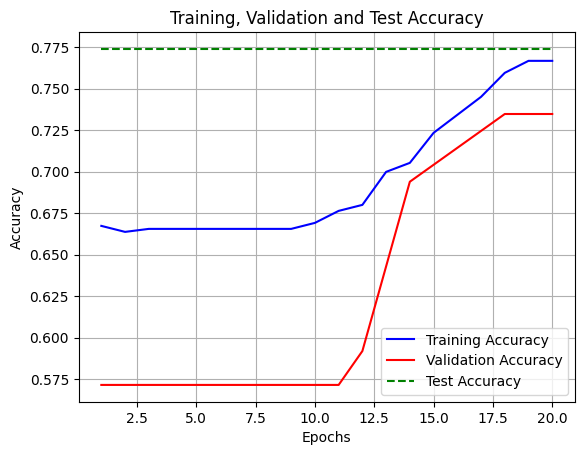

In [44]:
# Plot accuracy for train, test and validation data
test_accuracy_data = [test_accuracy] * epochs

plt.figure()
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy', color='red')
plt.plot(range(1, epochs + 1), test_accuracy_data, label='Test Accuracy', color='green', linestyle='--')
plt.title('Training, Validation and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

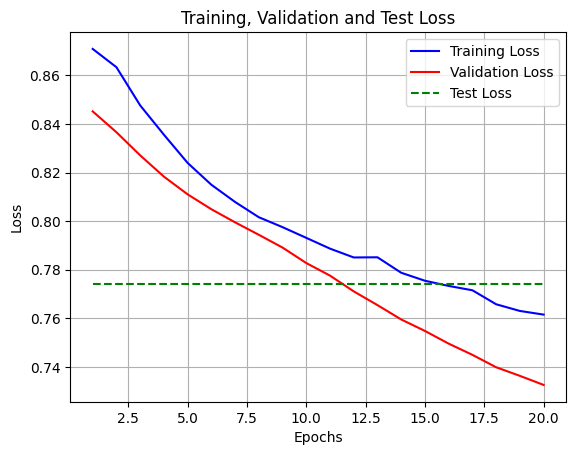

In [45]:
# Plot loss for train, test and validation data
test_loss_data = [test_loss] * epochs

plt.figure()
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', color='red')
plt.plot(range(1, epochs + 1), test_loss_data, label='Test Loss', color='green', linestyle='--')
plt.title('Training, Validation and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

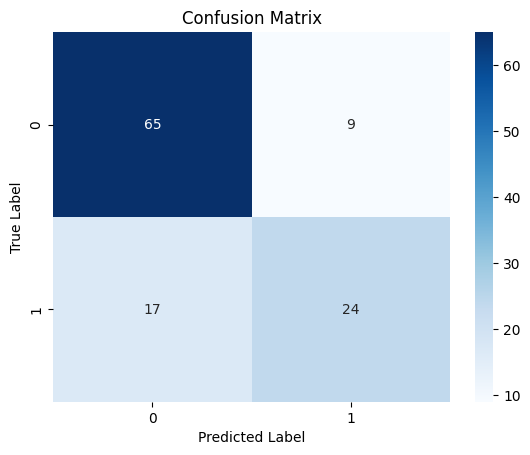

In [46]:
from sklearn.metrics import confusion_matrix

y_true_np = np.array(y_true)
y_pred_np = np.array(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_true_np, y_pred_np)

# Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

C:\Users\SWETA\AppData\Local\Temp\ipykernel_18560\807682579.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(y_pred).squeeze()


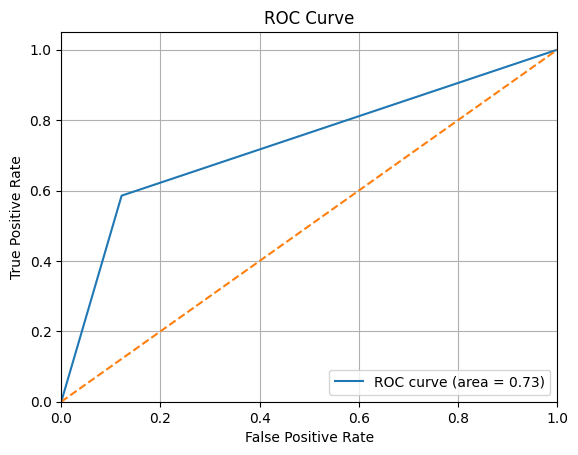

In [48]:
# Plot ROC curve
from torchmetrics import ROC, AUROC

y_pred = torch.tensor(y_pred).squeeze()
y_true = np.array(y_true, dtype=np.int64)
y_true = torch.tensor(y_true, dtype=torch.long)

roc = ROC(task='binary')
auroc = AUROC(task='binary')

# Calculate FPR, TPR, and thresholds for ROC curve
fpr, tpr, thresholds = roc(y_pred, y_true)

# Calculate AUROC score
roc_auc = auroc(y_pred, y_true)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### References

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html
# https://pytorch.org/docs/stable/tensors.html
# https://pytorch.org/docs/stable/data.html
# https://pytorch.org/docs/stable/nn.html
# https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
# https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout
# https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
# https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid
# https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
# https://github.com/TylerYep/torchinfo
# https://pytorch.org/docs/stable/optim.html
# https://lightning.ai/docs/torchmetrics/stable/classification/accuracy.html#
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
# https://lightning.ai/docs/torchmetrics/stable/classification/roc.html
# https://lightning.ai/docs/torchmetrics/stable/classification/auroc.html